In [10]:
import pandas as pd

total_data = pd.read_csv("../data/raw/sales.csv")

total_data["date"] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")

In [11]:
from pmdarima import auto_arima

sales = total_data["sales"]
model = auto_arima(sales, seasonal = False, trace = True, m = 7)

/home/alamo/.pyenv/versions/3.11.5/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.133, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.710 seconds


In [12]:
forecast = model.predict(15)
forecast

2023-09-04 17:10:08.079328    1002.158118
2023-09-05 17:10:08.079328    1004.831639
2023-09-06 17:10:08.079328    1007.423258
2023-09-07 17:10:08.079328    1010.021597
2023-09-08 17:10:08.079328    1012.619384
2023-09-09 17:10:08.079328    1015.217217
2023-09-10 17:10:08.079328    1017.815046
2023-09-11 17:10:08.079328    1020.412876
2023-09-12 17:10:08.079328    1023.010705
2023-09-13 17:10:08.079328    1025.608534
2023-09-14 17:10:08.079328    1028.206364
2023-09-15 17:10:08.079328    1030.804193
2023-09-16 17:10:08.079328    1033.402023
2023-09-17 17:10:08.079328    1035.999852
2023-09-18 17:10:08.079328    1038.597681
Freq: D, dtype: float64

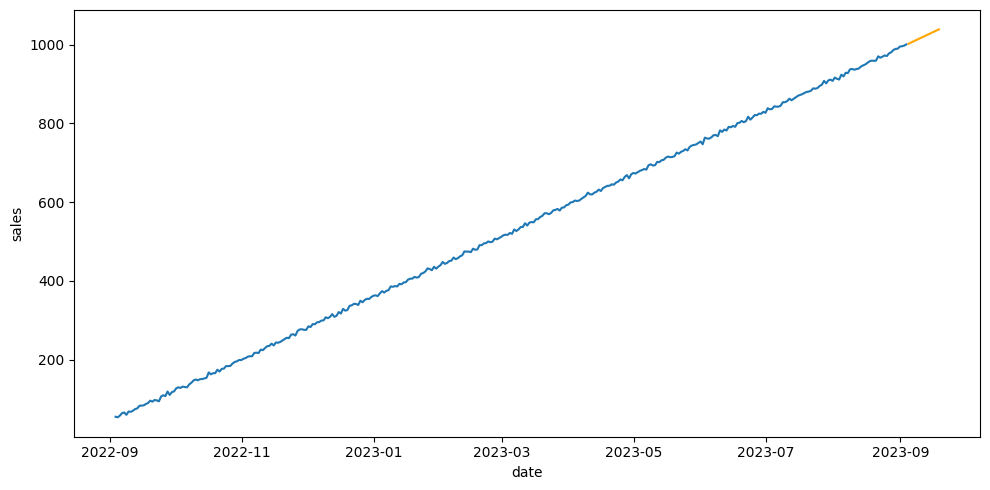

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales)
sns.lineplot(data = forecast, c = "orange")

plt.tight_layout()

plt.show()

In [ ]:
from pickle import dump

with open("../models/ARIMA-1.0.pkl", "wb") as f:
    dump(model, f)